In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import ImageDataGenerator
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from keras.preprocessing import image
from sklearn.cluster import KMeans
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten,Dense,Softmax,Activation, Dropout,BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils  import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
image_path=r'Thyroid_images'
images=[os.path.join(image_path,f) for f in os.listdir(image_path)]


In [3]:
img=cv2.imread(images[0])
img.shape

(360, 560, 3)

In [4]:
input_image=[]
labels=[]
for imgs in images:
    #print(imgs)
    img=image.load_img(imgs,target_size=(224,224,3))
    img=image.img_to_array(img)
    print(img.shape)
    img=img/255
    input_image.append(img)
    l=re.split('[_.]',imgs)
    labels.append(int(l[-2]))

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [5]:
Input_image=np.array(input_image)
Input_image.shape

(480, 224, 224, 3)

In [6]:
labels[:10]

[1, 1, 2, 1, 1, 2, 1, 1, 1, 1]

In [7]:
n_classes=np.unique(labels)

In [8]:
n_classes

array([1, 2, 3, 4, 5])

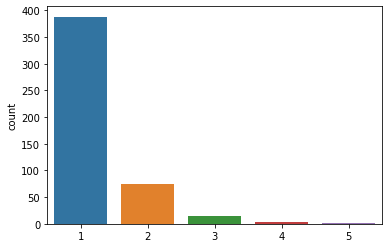

In [9]:
sns.countplot(labels)

In [10]:
Y=LabelBinarizer().fit_transform(labels)

In [11]:
Y.shape

(480, 5)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(Input_image,Y,test_size=0.2,random_state=42)

In [13]:
X_test.shape

(96, 224, 224, 3)

In [14]:
X_train.shape

(384, 224, 224, 3)

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [16]:
input_shape=(224,224,3)
num_classes=5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)       

In [17]:
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
history=model.fit(X_train,Y_train, batch_size=10,epochs=2,callbacks=[learning_rate_reduction],validation_data=(X_test,Y_test))

Train on 384 samples, validate on 96 samples
Epoch 1/2
384/384 [==============================] - 73s 189ms/step - loss: 0.8737 - accuracy: 0.7396 - val_loss: 0.6380 - val_accuracy: 0.8438
Epoch 2/2
384/384 [==============================] - 89s 232ms/step - loss: 0.6288 - accuracy: 0.8021 - val_loss: 0.4763 - val_accuracy: 0.8438


In [20]:
model.save('Thyroid_new.h5')

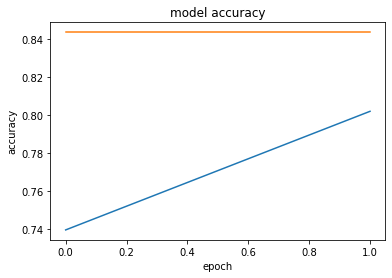

In [21]:
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
# plt.plot([i for i in range(20)],train_accuracy)
# plt.plot([i for i in range(20)],val_accuracy)
#Summarizingg history for accracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], location='upper left')
plt.show()

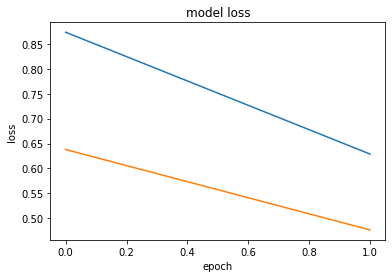

In [22]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
# plt.plot([i for i in range(20)],train_loss)
# plt.plot([i for i in range(20)],val_loss)
#Summarizingg history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], location='upper left')
plt.show()


In [23]:
y_pred=model.predict(X_test)
print(np.argmax(y_pred,axis=1))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
prob=y_pred=model.predict(X_test[1].reshape(1,224,224,3))
print(prob)
print(np.argmax(prob,axis=1))
label=np.argmax(prob,axis=1)

[[0.6952652  0.2365585  0.04463696 0.01569242 0.00784696]]
[0]


(224, 224, 3)
(22, 22)


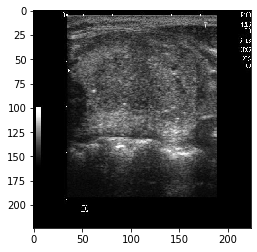

0
(224, 224, 3)
(22, 22)


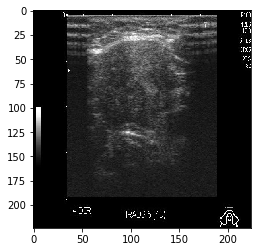

1


In [25]:
def occlusion(image,label,occ_size=10,occ_stride=10,occ_pix=0.5):
    print(image.shape)
    Image=image.copy()
    image_width=image.shape[0]
    image_height=image.shape[1]
    output_width=int(np.ceil((image_width-occ_size)/occ_stride))
    output_height=int(np.ceil((image_height-occ_size)/occ_stride))
    heatmap=np.zeros((output_width,output_height))
    print(heatmap.shape)
    stop=0
    for h in range(image_height):
        for w in range(image_width):
            h_start=h*occ_stride
            w_start=w*occ_stride
            h_end=min(image_height,h_start+occ_stride)
            w_end=min(image_width,w_start+occ_stride)
            #print(w_end,h_end)
            if(w_end>=image_width or h_end>=image_height):
                continue
            img=image.copy()
            img[w_start:w_end,h_start:h_end,:]=occ_pix
            out=model.predict(img.reshape(1,224,224,3))
            prob=out
            #print(np.max(prob,axis=1))
            if(np.max(prob,axis=1)<0.50): #change the probality according to the image
             #Image[w_start:w_end,h_start:h_end,:]=occ_pix
                rect=cv2.rectangle(Image, (w_start,h_start), (w_end,h_end), (255,0,0), 1)
                stop=1
             #cv2.imwrite("thyroid.png",Image)
             #cv2.imshow('Thyroid',Image)
             #k = cv2.waitKey(0)
                break
        if(stop==1):
             break
            #heatmap[h,w]=prob[0]
            #print(w_end,h_end)
    plt.imshow(Image)
    plt.show()
    return heatmap
    
for i in range(2):
    htmap=occlusion(X_test[i],label)  
    print(i) #try images 5,27

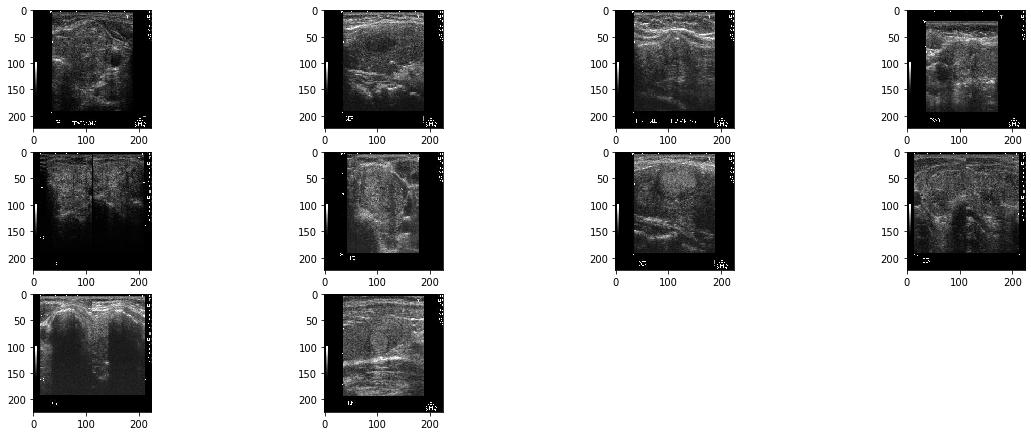

In [26]:
i=0
plt.figure(figsize=(20,10))
for imgs in Input_image[:10]:
    plt.subplot(4,4,i+1)
    plt.imshow(imgs)
    i+=1
plt.show()

In [27]:
def image_flatten(image):
    Image_flatten=[]
    for img in image:
        img_flatten=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
        Image_flatten.append(img_flatten)
    return np.array(Image_flatten)

In [28]:
X_flatten=image_flatten(Input_image[:100])

In [29]:
X_flatten[0].shape

(50176, 3)

In [30]:
segmented_image=[]
for im in X_flatten:
        km=KMeans(n_clusters=5).fit(im)
        seg=km.cluster_centers_[km.labels_]
        img_seg=seg.reshape(224,224,3)
        segmented_image.append(img_seg)

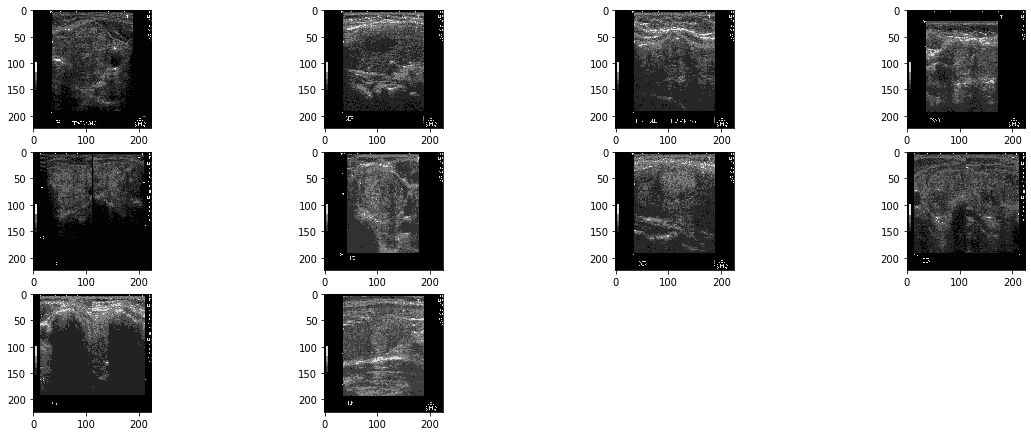

In [31]:
i=0
plt.figure(figsize=(20,10))
for seg in segmented_image[:10]:
    plt.subplot(4,4,i+1)
    plt.imshow(seg)
    i+=1
plt.show()